In [ ]:
# ! pip install ultralytics opencv-python numpy

In [ ]:
from ultralytics import YOLO
from utils import *
import cv2

In [3]:
YOLO_MODEL_NAME = 'models/yolov8n.pt'
IMG = "image/4.jpg"        # Using the fast Nano model as an example

model = YOLO(YOLO_MODEL_NAME)
print(f"Model loaded: {YOLO_MODEL_NAME}")


Model loaded: models/yolov8n.pt


In [4]:
from matplotlib import pyplot as plt

class YoloFaceDetector:
    def __init__(self, model_path=YOLO_MODEL_NAME, conf_threshold=0.5):
        self.model = YOLO(model_path)
        self.conf_threshold = conf_threshold

    def detect_faces(self, image):
        results = self.model.predict(image, save=False, verbose=False, conf=self.conf_threshold)
        return results
    
    def add_noise_annotate(self, image, sigma: list):
        noisy_images = [add_gaussian_noise(image, sigma=s) for s in sigma]
        annotated_images = [draw_yolo_boxes(self.detect_faces(img), img) for img in noisy_images]
        return annotated_images

    def show(self, image_path, SIGMA):
        image = read_image(image_path)
        annotated_images = self.add_noise_annotate(image, SIGMA)

        plt.figure(figsize=(18,12))
        for i, (s, img) in enumerate(zip(SIGMA, annotated_images)):
            plt.subplot(1, 6, i + 1)
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
            if i == 0:
                plt.title(f'Grount Truth')
            else: 
                plt.title(f'Sigma: {s}')
            plt.axis('off')
        plt.show()

In [5]:
import cv2


SIGMA = [0, 0.05, 0.1, 0.15, 0.30, 0.8]          # Smooth Gaussian noise levels
SALT_PEPPER = [
    (0.0, 0.0), 
    (0.005, 0.005),
    (0.01, 0.01),
    (0.015, 0.015),
    (0.03, 0.03),
    (0.08, 0.08)
]
POISSION_LAMBDA = [10, 1, 0.5, 0.1, 0.08, 0.05]    # Poisson noise levels

gaussian_noise = []
salt_and_pepper_noise = []
poisson_noise = []

img1 = read_image("image/image.png")

Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.58
Detections: 4, Min confidence: 0.55
Detections: 2, Min confidence: 0.51
Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.70
Detections: 4, Min confidence: 0.64
Detections: 2, Min confidence: 0.62
Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.63
Detections: 2, Min confidence: 0.52
Detections: 1, Min confidence: 0.55
Detections: 1, Min confidence: 0.52
Detections: 4, Min confidence: 0.77
Detections: 3, Min confidence: 0.61
Detections: 1, Min confidence: 0.69
Detections: 4, Min confidence: 0.79
Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.71
Detections: 3, Min confidence: 0.51
Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.71
Detections: 4, Min confidence: 0.74
Detections: 2, Min confidence: 0.53


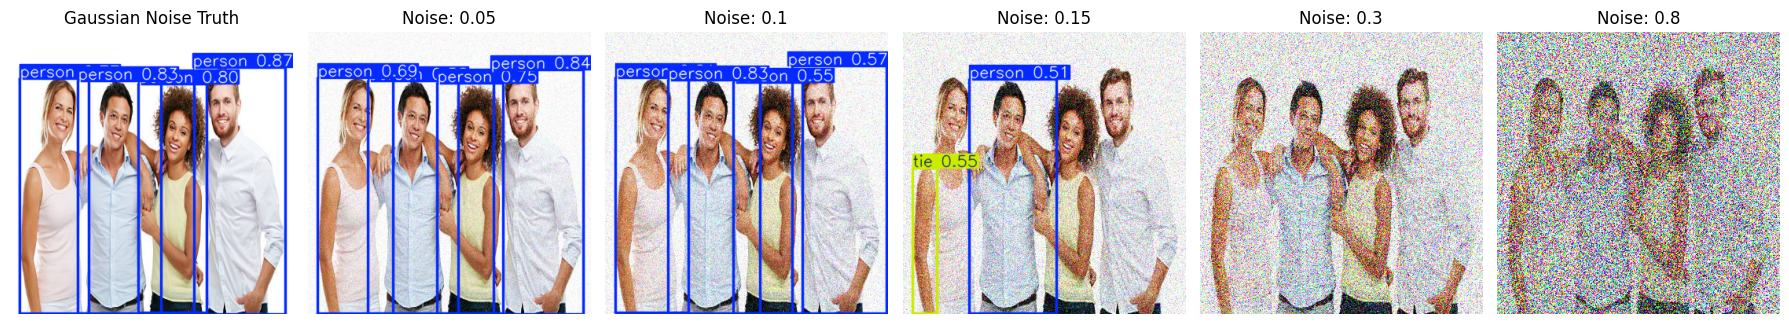

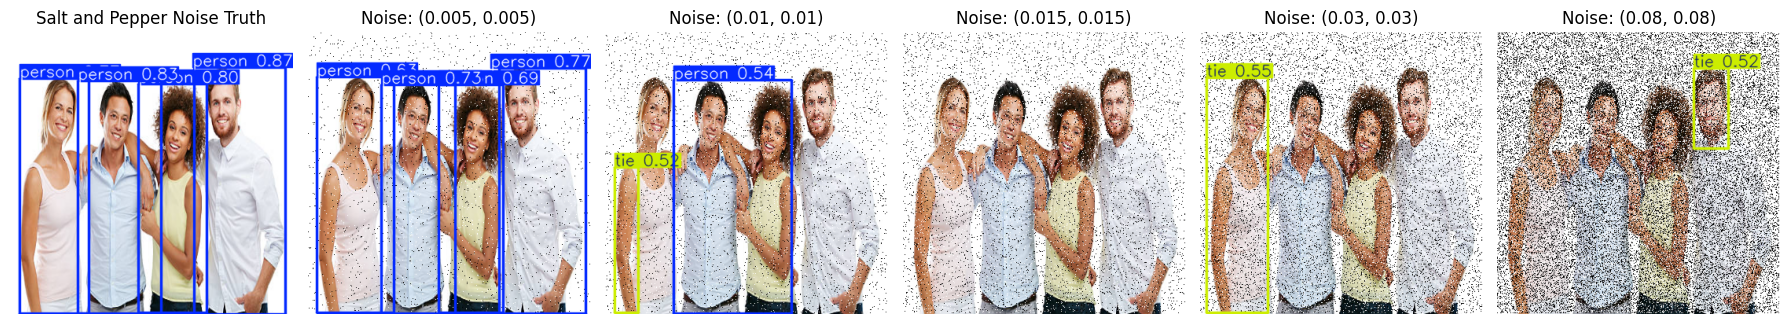

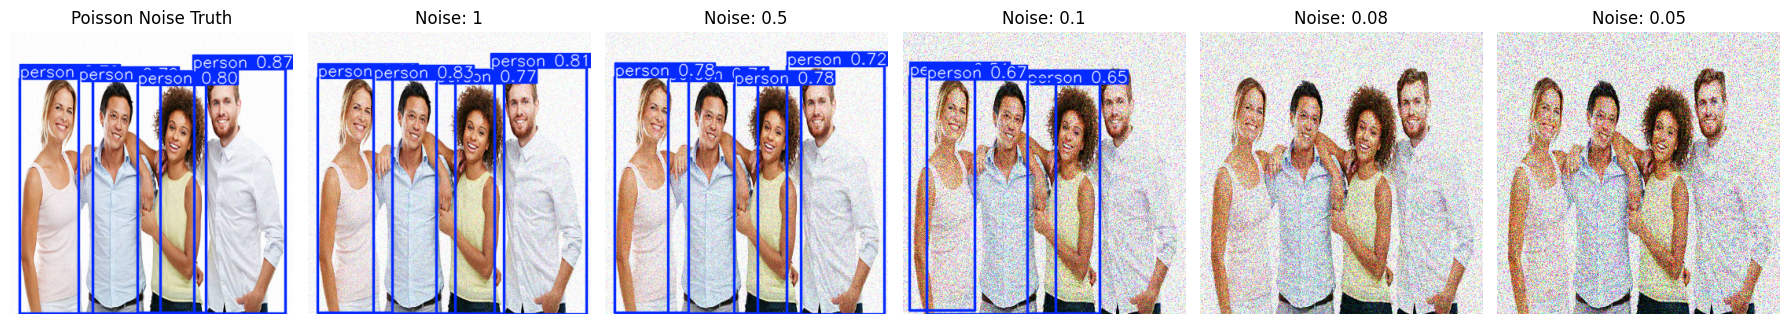

In [ ]:
from utils import _show

for i in range(len(SIGMA)):
    gaussian_noise.append(add_gaussian_noise(img1, sigma=SIGMA[i]))
    salt_and_pepper_noise.append(add_salt_and_pepper_noise(img1, salt_prob=SALT_PEPPER[i][0], pepper_prob=SALT_PEPPER[i][1]))
    poisson_noise.append(add_poisson_noise(img1, intensity=POISSION_LAMBDA[i]))


GT = model.predict(img1, save=False, verbose=False, conf=0.5)

predicted_gaussian = [model.predict(img, save=False, verbose=False, conf=0.5) for img in gaussian_noise]
predicted_salt_paper = [model.predict(img, save=False, verbose=False, conf=0.5) for img in salt_and_pepper_noise]
predicted_poisson = [model.predict(img, save=False, verbose=False, conf=0.5) for img in poisson_noise]

annoted_gaussian = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_gaussian, gaussian_noise)]
annoted_salt_pepper = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_salt_paper, salt_and_pepper_noise)]
annoted_poisson = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_poisson, poisson_noise)]

_show(SIGMA, annoted_gaussian, 'Gaussian Noise')
_show(SALT_PEPPER, annoted_salt_pepper, 'Salt and Pepper Noise')
_show(POISSION_LAMBDA, annoted_poisson, 'Poisson Noise')

# for i, x in enumerate(metrics_noise):
#     print(f"\n=== Gaussian Noise Sigma: {SIGMA[i]} ===")
#     recall, avg_iou, tp_count = x
#     print(f"Total GT : {len(predic[0][0].boxes)}")
#     print(f"True Positives Count: {tp_count}")
#     print(f"Overall Recall @0.5: {recall:.4f} ({tp_count}/{len(predicted_jpeg[0][0].boxes)})")
#     print(f"Average IoU of True Positives: {avg_iou:.4f}")

In [ ]:
img2 = read_image("image/grp-3.jpg")

gaussian_noise = []
salt_and_pepper_noise = []
poisson_noise = []

for i in range(len(SIGMA)):
    gaussian_noise.append(add_gaussian_noise(img2, sigma=SIGMA[i]))
    salt_and_pepper_noise.append(add_salt_and_pepper_noise(img2, salt_prob=SALT_PEPPER[i][0], pepper_prob=SALT_PEPPER[i][1]))
    poisson_noise.append(add_poisson_noise(img2, intensity=POISSION_LAMBDA[i]))


GT = model.predict(img2, save=False, verbose=False, conf=0.5)

predicted_gaussian = [model.predict(img, save=False, verbose=False, conf=0.5) for img in gaussian_noise]
predicted_salt_paper = [model.predict(img, save=False, verbose=False, conf=0.5) for img in salt_and_pepper_noise]
predicted_poisson = [model.predict(img, save=False, verbose=False, conf=0.5) for img in poisson_noise]

annoted_gaussian = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_gaussian, gaussian_noise)]
annoted_salt_pepper = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_salt_paper, salt_and_pepper_noise)]
annoted_poisson = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_poisson, poisson_noise)]

_show(SIGMA, annoted_gaussian, 'Gaussian Noise')
_show(SALT_PEPPER, annoted_salt_pepper, 'Salt and Pepper Noise')
_show(POISSION_LAMBDA, annoted_poisson, 'Poisson Noise')

In [ ]:


# new = add_poisson_noise(img1, intensity=0.001)
# plt.imshow(cv2.cvtColor(new, cv2.COLOR_BGR2RGB))
# plt.title('Poisson Noise Intensity: 10')
# plt.axis('off')
# plt.show()

In [ ]:
from robustness_metrics import calculate_robustness_metrics

recall, avg_iou, tp_count = calculate_robustness_metrics(GT, predicted_jpeg[3], iou_threshold=0.5)

metrics_noise = [calculate_robustness_metrics(GT, pred, iou_threshold=0.5) for pred in predicted_gaussian]
metrics_jpeg = [calculate_robustness_metrics(GT, pred, iou_threshold=0.5) for pred in predicted_jpeg]

print(f"Total GT : {len(GT[0].boxes)}")
print(f"True Positives Count: {tp_count}")
print(f"Overall Recall @0.5: {recall:.4f} ({tp_count}/{len(GT[0].boxes)})")
print(f"Average IoU of True Positives: {avg_iou:.4f}")


Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.68
Detections: 3, Min confidence: 0.62
Detections: 3, Min confidence: 0.51


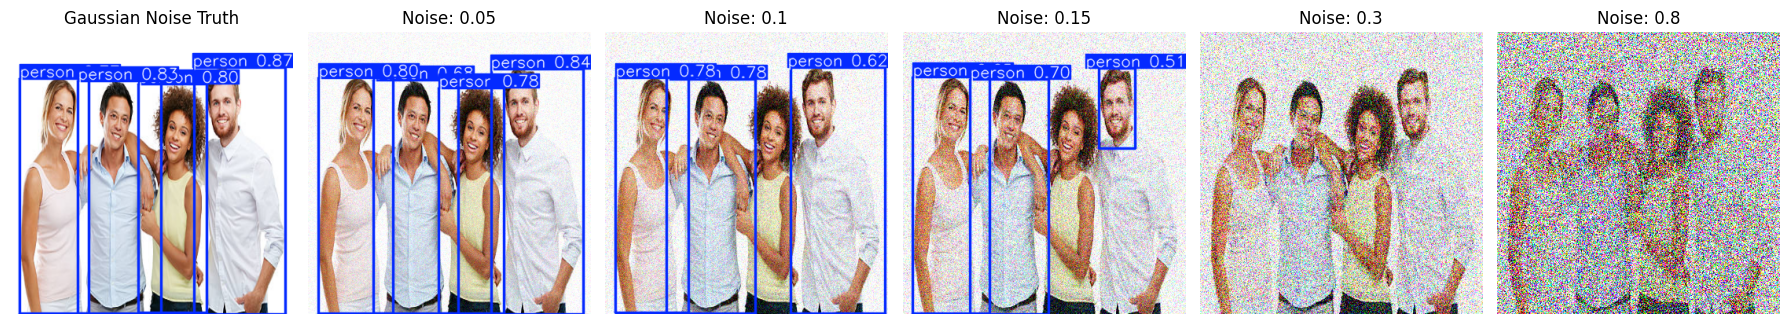

Detections: 4, Min confidence: 0.77
Detections: 4, Min confidence: 0.65


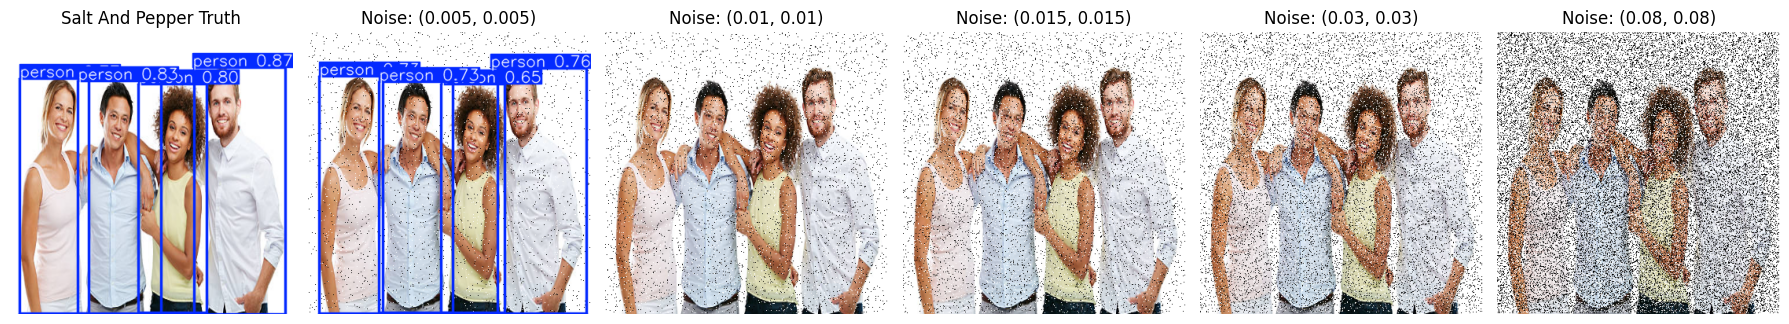

Detections: 4, Min confidence: 0.78
Detections: 4, Min confidence: 0.74
Detections: 4, Min confidence: 0.72
Detections: 1, Min confidence: 0.53


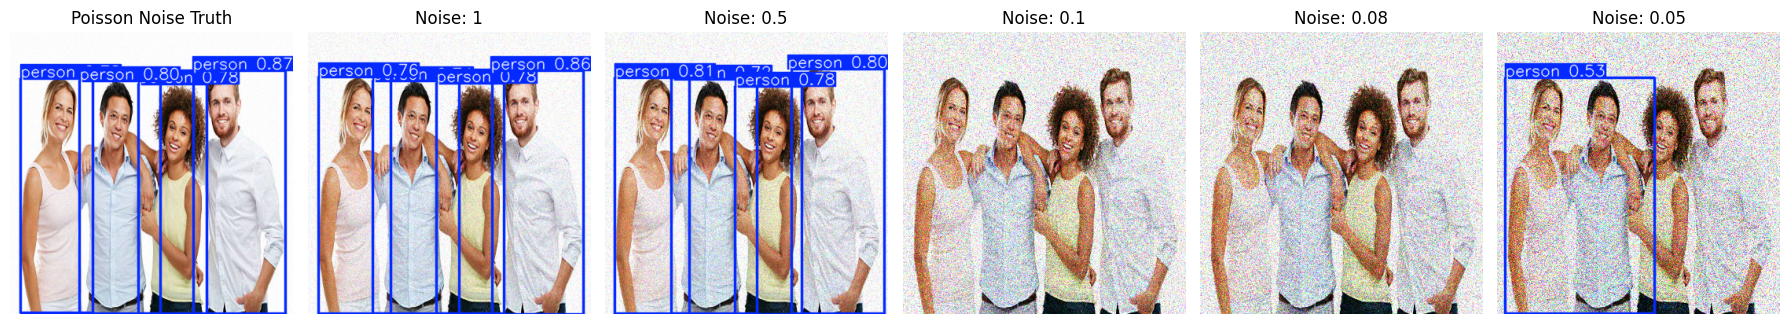

In [9]:
def pipeline(model, image_path, noise_type, values):
    image = read_image(image_path)
    noisy_images = []
    
    if noise_type == 'gaussian_noise':
        noisy_images = [add_gaussian_noise(image, sigma=s) for s in values]
    elif noise_type == 'salt_and_pepper':
        noisy_images = [add_salt_and_pepper_noise(image, salt_prob=s[0], pepper_prob=s[1]) for s in values]
    elif noise_type == 'poisson_noise':
        noisy_images = [add_poisson_noise(image, intensity=i) for i in values]
    else:
        raise ValueError("Unsupported noise type")
    
    predicted_results = [model.predict(img, save=False, verbose=False, conf=0.5) for img in noisy_images]
    annotated_images = [draw_yolo_boxes(pred, img) for pred, img in zip(predicted_results, noisy_images)]
    
    _show(values, annotated_images, noise_type.replace('_', ' ').title())

pipeline(model, "image/image.png", 'gaussian_noise', SIGMA)
pipeline(model, "image/image.png", 'salt_and_pepper', SALT_PEPPER)
pipeline(model, "image/image.png", 'poisson_noise', POISSION_LAMBDA)